Question 1: What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.

Ans:
| Feature | K-Means Clustering | Hierarchical Clustering |
|----------|----------|----------|
| Approach    | Partitioning: Splits data into $K$ non-overlapping groups.   | Tree-based: Builds a hierarchy of clusters (Dendrogram).   |
| Parameters    | You must define the number of clusters ($K$) before running it.   | No need to define $K$ upfront; you can cut the tree at any level.   |
| Scalability | Fast and efficient. Great for large datasets. | Slow (computationally expensive). Best for small datasets. |
| Shape | Assumes clusters are spherical (globular). | Can capture more complex structures depending on the linkage method. |

Use Cases:

- K-Means: Customer Segmentation. A company with 1 million customers wants to group them into 5 distinct segments (e.g., High Spenders, Occasional Buyers) for marketing.

- Hierarchical: ** biological Taxonomy**. Biologists use it to group species based on genetic traits to understand evolutionary trees, where sub-groups exist within larger groups.


Question 2: Explain the purpose of the Silhouette Score in evaluating clustering algorithms.

Ans : The Silhouette Score is a metric used to evaluate how good the clustering is, especially when you don't have "true" labels to compare against. It measures two things for each point:

1. Cohesion: How close the point is to other points in its own cluster.

2. Separation: How far the point is from points in the nearest neighboring cluster.

Interpretation:

- Score range: -1 to +1.

- +1: Perfect clustering (points are very close to their cluster center and far from others).

- 0: Overlapping clusters (points are on the boundary).

- -1: Incorrect clustering (points are assigned to the wrong cluster).


Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?


Ans : DBSCAN (Density-Based Spatial Clustering of Applications with Noise) relies on two main parameters:

1. eps (Epsilon):

- Definition: The maximum radius (distance) around a data point to search for neighbors.

- Influence: If eps is too small, points cannot "reach" each other, leading to many unclustered outliers (noise). If eps is too large, distinct clusters will merge into one giant cluster.

2. min_samples:

- Definition: The minimum number of points required within the eps radius to form a "dense region" (a core cluster point).

- Influence: If min_samples is high, the algorithm becomes stricter, filtering out more noise but possibly missing smaller or less dense clusters.


Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

Ans 4 : Feature scaling (normalization) is critical because these algorithms rely entirely on distance calculations (like Euclidean distance).

- The Problem: If one feature has a large range (e.g., Salary: 20,000 to 100,000) and another has a small range (e.g., Age: 20 to 60), the distance calculation will be completely dominated by Salary. The algorithm will basically ignore Age.

- The Solution: Scaling ensures all features contribute equally to the result by bringing them to the same range (usually 0 to 1 or Mean=0, Variance=1).


Question 5: What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?

Ans 5 : The Elbow Method is a heuristic (rule of thumb) used to find the best value for $K$ (number of clusters).
1. Run K-Means: You run the algorithm multiple times with different $K$ values (e.g., $K=1$ to $K=10$).
2. Calculate Inertia: For each $K$, you calculate the Inertia (or WCSS - Within-Cluster Sum of Squares), which is the sum of squared distances between points and their cluster centers.
3. Plot: Plot $K$ on the x-axis and Inertia on the y-axis.
4. Find the Elbow: As $K$ increases, Inertia decreases. You look for the "elbow point" where the rate of decrease shifts abruptly. This point represents the best tradeoff between fit and complexity (optimal $K$).

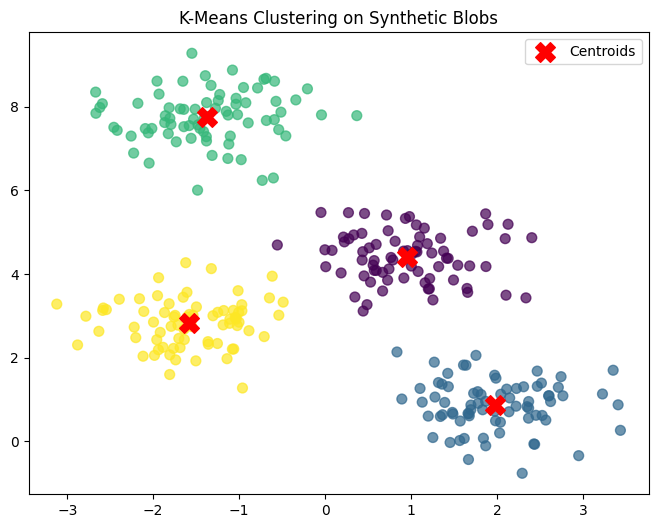

In [2]:
''' Question 6: Generate synthetic data using make_blobs, apply KMeans clustering,
    and visualize the results with cluster centers.'''

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate Synthetic Data
# 300 samples, 4 distinct centers (clusters)
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 2. Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# 3. Visualize
plt.figure(figsize=(8, 6))
# Plot data points colored by cluster
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.7)
# Plot the centers (red distinct dots)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.title("K-Means Clustering on Synthetic Blobs")
plt.legend()
plt.show()


In [3]:
'''Question 7: Load the Wine dataset, apply StandardScaler, and then train a DBSCAN
   model. Print the number of clusters found (excluding noise).'''

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Load Data
wine = load_wine()
X = wine.data

# 2. Scale Data (Crucial for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train DBSCAN
# Note: eps and min_samples might need tuning.
# We use standard starting values here.
dbscan = DBSCAN(eps=2.5, min_samples=5) # eps adjusted for 13-dim space
labels = dbscan.fit_predict(X_scaled)

# 4. Count Clusters
# DBSCAN labels noise as -1. We must exclude it.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("--- DBSCAN Results (Wine Dataset) ---")
print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points:   {n_noise}")

--- DBSCAN Results (Wine Dataset) ---
Number of clusters found: 1
Number of noise points:   24


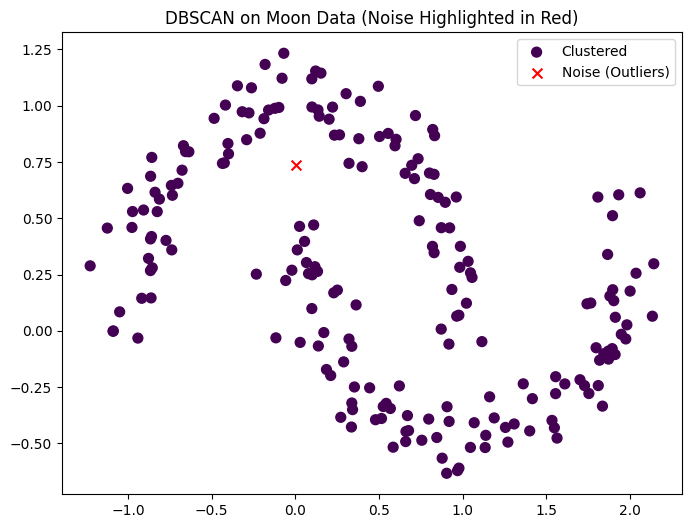

In [4]:
'''Question 8: Generate moon-shaped synthetic data using make_moons, apply DBSCAN,
   and highlight the outliers in the plot.'''

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# 1. Generate Moons Data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# 2. Apply DBSCAN
# Moons are dense, so a smaller eps works well to separate them
dbscan = DBSCAN(eps=0.25, min_samples=5)
labels = dbscan.fit_predict(X)

# 3. Visualization
plt.figure(figsize=(8, 6))

# Plot Clusters (labels >= 0)
plt.scatter(X[labels >= 0, 0], X[labels >= 0, 1], c=labels[labels >= 0], cmap='viridis', s=50, label='Clustered')

# Plot Noise/Outliers (label == -1) in Red
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], c='red', s=50, marker='x', label='Noise (Outliers)')

plt.title("DBSCAN on Moon Data (Noise Highlighted in Red)")
plt.legend()
plt.show()

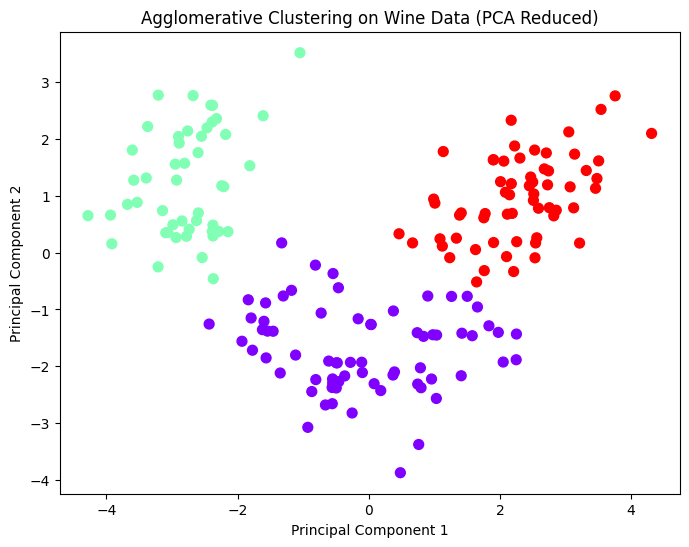

In [5]:
'''Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative
 Clustering and visualize the result in 2D with a scatter plot.'''


import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# 1. Load and Scale
wine = load_wine()
X = wine.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Reduce to 2D using PCA (for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Apply Agglomerative Clustering
# We assume 3 clusters (since there are 3 wine classes)
agg_cluster = AgglomerativeClustering(n_clusters=3)
labels = agg_cluster.fit_predict(X_pca)

# 4. Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow', s=50)
plt.title("Agglomerative Clustering on Wine Data (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Question 10: You are working as a data analyst at an e-commerce company... Describe your real-world data science workflow using clustering.

Ans 10 : $Real-World Clustering Workflow$

1. Algorithm Selection: I would choose K-Means Clustering.
- Why?: It is computationally efficient for large customer datasets and produces distinct, non-overlapping segments that are easy for the marketing team to interpret (e.g., "High Value" vs. "Bargain Hunters").

2. Preprocessing:
- Missing Values: Impute missing data (e.g., fill missing income with the median).
- Feature Selection: Select relevant features like Total Spend, Frequency of Purchase, and Recency (RFM Analysis).
- Scaling: Apply StandardScaler to ensure high-value features (like Spend = 5000) don't dominate low-value features (like Frequency = 5).
3. Determining Clusters:
- I would use the Elbow Method to visualize the tradeoff between variance and $K$.
- I would cross-verify with the Silhouette Score to ensure the clusters are well-separated.
4. Business Benefit:
- The marketing team can stop sending generic emails.
- Cluster 1 (High Spenders): Receive VIP exclusive offers.
- Cluster 2 (Churn Risk): Receive "We miss you" coupons.
- This leads to higher conversion rates and better customer retention.

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --- Simulation of Customer Data ---
# Features: [Annual Income ($k), Spending Score (1-100)]
# Creating synthetic data for 500 customers
from sklearn.datasets import make_blobs
X_customers, _ = make_blobs(n_samples=500, centers=5, cluster_std=1.5, random_state=42)

# --- 1. Preprocessing (Scaling) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_customers)

# --- 2. Determine Optimal K (Elbow/Silhouette) ---
# Let's test K=5 based on domain knowledge or Elbow analysis
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# --- 3. Evaluation ---
score = silhouette_score(X_scaled, labels)

# --- 4. Business Output ---
# Attach labels to original data for the marketing team
df_marketing = pd.DataFrame(X_customers, columns=['Income', 'Spending_Score'])
df_marketing['Cluster_ID'] = labels

print("--- E-Commerce Customer Segmentation ---")
print(f"Optimal Clusters Chosen: {k}")
print(f"Silhouette Score (Quality): {score:.4f}")
print("\nSample Data for Marketing Team:")
print(df_marketing.head())
print("\nInterpretation:")
print("Cluster 0 might be 'High Income, Low Spending' (Potential Savers)")
print("Cluster 1 might be 'High Income, High Spending' (VIPs)")

--- E-Commerce Customer Segmentation ---
Optimal Clusters Chosen: 5
Silhouette Score (Quality): 0.5736

Sample Data for Marketing Team:
     Income  Spending_Score  Cluster_ID
0  4.621509        0.627288           4
1  1.887697        6.321627           1
2  0.101844        5.470138           1
3 -0.222022        0.436588           1
4 -9.685815       -7.407380           0

Interpretation:
Cluster 0 might be 'High Income, Low Spending' (Potential Savers)
Cluster 1 might be 'High Income, High Spending' (VIPs)
